In [1]:
import numpy as np
from pycomposer.composition_controler import CompositionControler
from pycomposer.inferablepitch.rtrbm_inferer import RTRBMInferer
from pycomposer.inferableconsonance.q_consonance import QConsonance
from pycomposer.midi_vectorlizer import MidiVectorlizer

In [2]:
midi_vectorlizer = MidiVectorlizer()
tone_df = midi_vectorlizer.extract("../../furudokei.mid")
tone_df = tone_df.sort_values(by=["start", "end"])

In [3]:
r_dict = {
    (1, 1): 5.0,
    (15, 16): 0.0,
    (8, 9): 0.0,
    (5, 6): 0.5,
    (4, 5): 0.5,
    (2, 1): 5.0,
    (32, 45): 0.0,
    (2, 3): 5.0,
    (5, 8): 0.5,
    (3, 5): 0.5,
    (9, 16): 0.0,
    (8, 15): 0.0,
    (1, 2): 5.0
}

inferable_consonance = QConsonance()
inferable_consonance.epsilon_greedy_rate = 0.9
inferable_consonance.alpha_value = 0.6
inferable_consonance.gamma_value = 0.7
inferable_consonance.initialize(r_dict=r_dict, tone_df=tone_df)
for pitch in tone_df.pitch.values.tolist():
    inferable_consonance.learn(state_key=pitch, limit=2)

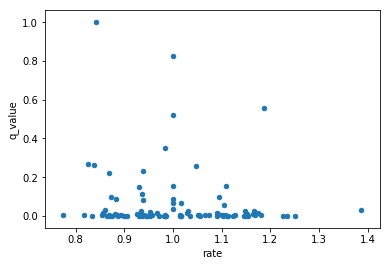

In [14]:
import matplotlib.pyplot as plt
q_df = inferable_consonance.q_df.copy()
q_df["rate"] = q_df["state_key"] / q_df["action_key"]
#q_df = q_df[q_df.q_value > 0]
q_df.plot.scatter(x="rate", y="q_value")
plt.show();plt.close()

In [5]:
inferable_pitch = RTRBMInferer(
    learning_rate=0.00001,
    hidden_n=100,
    hidden_binary_flag=True,
    inferancing_training_count=1,
    r_batch_size=200
)

In [6]:
tone_df = tone_df[tone_df.program == 22]
inferable_pitch.learn(tone_df=tone_df, training_count=1, batch_size=200)

In [7]:
composition_controler = CompositionControler(
    resolution=960,
    initial_tempo=120
)

In [8]:
chord_list = composition_controler.create_chord_list(
    octave=5, 
    first_chord="IV",
    total_measure_n=40
)

composition_controler.compose_chord(
    chord_list,
    metronome_time=100, 
    start_measure_n=0,
    measure_n=8,
    beat_n=8,
    chord_instrument_num=34,
    chord_velocity_range=(90, 95)
)

In [9]:
composition_controler.compose_melody(
    inferable_pitch,
    inferable_consonance,
    chord_list,
    total_measure_n=40,
    measure_n=8,
    start_measure_n=0,
    beat_n=8,
    metronome_time=100,
    melody_instrument_num=0,
    melody_velocity_range=(120, 127)
)

In [10]:
df = composition_controler.export_df().describe()

In [11]:
composition_controler.save("test7.mid")

In [12]:
#midi_vectorlizer.extract("test3.mid")